In [31]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [38]:
points =  np.random.randint(1,50, size=(20,2))

In [39]:
points;

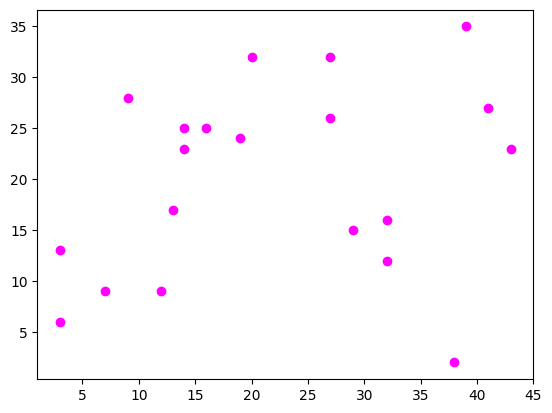

In [40]:
scat = plt.scatter(points[:,0], points[:,1], color="magenta")

# 1

Спроектируйте и создайте функции для построения выпуклой оболочки
заданного множества точек плоскости с использованием алгоритма
Джарвиса. Проведите тестирование.

In [41]:
def jarvis(data: np.ndarray) -> np.ndarray:
    temp_data, indexes = np.unique(data, axis=0, return_index=True)
    points = data[np.sort(indexes)]
    
    if len(points) <= 2:
        return points
        
    first_point = points[np.argmin(points[:, 0])] # саый маленький x
    poly = [first_point]
    def orientation(p, q, r):
        # Возвращает значение > 0, если поворот против часовой стрелки, < 0 - по часовой, 0 - коллинеарны
        return (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    current_point = first_point
    while True:
        # Выбираем первую точку, которая не является текущей для потенциальной проверки
        next_point = points[0] if not np.array_equal(points[0], current_point) else points[1]
        
        for point in points:
            # Проверка, чтобы point не был равен current_point
            if np.array_equal(point, current_point):
                continue
            
            # Определяем ориентацию текущей точки, следующей и проверяемой точки
            orient = orientation(current_point, next_point, point)
            if orient > 0 or (orient == 0 and np.linalg.norm(point - current_point) > np.linalg.norm(next_point - current_point)):
                next_point = point
        
        # Добавляем следующую точку в полигон
        if np.array_equal(next_point, first_point):  # Если замкнулся контур
            break
        
        poly.append(next_point)
        current_point = next_point

    return np.array(poly)

In [42]:
jarvis(points)

array([[ 3, 13],
       [ 3,  6],
       [38,  2],
       [43, 23],
       [39, 35],
       [20, 32],
       [ 9, 28]])

In [43]:
from matplotlib.patches import Polygon

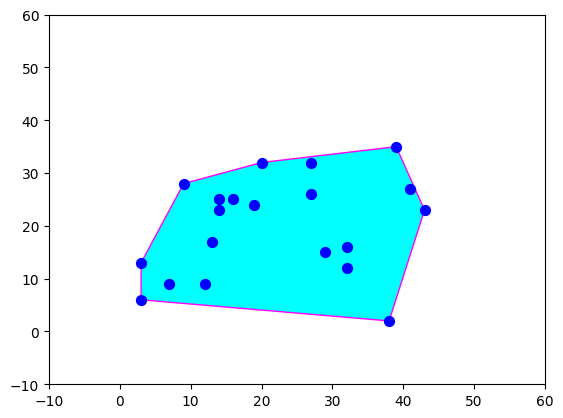

In [44]:
poly_plot = Polygon(jarvis(points), closed=True, edgecolor='magenta', facecolor='cyan', alpha=1)
ax = plt.subplot()
ax.add_patch(poly_plot)
ax.scatter(points[:, 0], points[:, 1], color='blue', s=50, marker='o')
ax.set_xlim(-10, 60)
ax.set_ylim(-10, 60)
plt.show()

# 2

Создайте визуализацию алгоритма Джарвиса построения выпуклой
оболочки конечного множества точек плоскости

In [45]:
def jarvis_animate(data: np.ndarray) -> np.ndarray:
    _, indexes = np.unique(data, axis=0, return_index=True)
    points = data[np.sort(indexes)]
    
    if len(points) <= 2:
        return points
        
    first_point = points[np.argmin(points[:, 0])]  # самый маленький x
    poly = [first_point]
    
    def orientation(p, q, r):
        return (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    current_point = first_point
    
    # Визуализация начального состояния
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Точки', zorder=2)
    plt.scatter(first_point[0], first_point[1], c='red', label='Первая точка', s=100, zorder=3)
    
    # Устанавливаем заголовок и оси
    plt.title('Визуализация алгоритма Джарвиса')
    plt.grid()
    plt.axis('equal')

    while True:
        next_point = points[0] if not np.array_equal(points[0], current_point) else points[1]

        for point in points:
            if np.array_equal(point, current_point):
                continue
            
            orient = orientation(current_point, next_point, point)
            if orient > 0 or (orient == 0 and np.linalg.norm(point - current_point) > np.linalg.norm(next_point - current_point)):
                next_point = point

        # Отображение всех точек
        plt.scatter(points[:, 0], points[:, 1], c='blue', label='Точки', zorder=2)

        # Отрисовка всех предыдущих отрезков в магентовом цвете
        if len(poly) > 1:
            plt.plot(*zip(*poly), color='magenta', marker='o', zorder=1)

        # Добавление текущего отрезка
        plt.plot([current_point[0], next_point[0]], [current_point[1], next_point[1]], color='green', linewidth=2, zorder=3)
        plt.scatter(next_point[0], next_point[1], c='orange', s=100, zorder=4)  # Следующая точка
        plt.pause(0.5)  # Пауза для визуализации

        if np.array_equal(next_point, first_point):
            break
        
        poly.append(next_point)
        current_point = next_point

    # Замыкание контур
    plt.plot(*zip(*poly, poly[0]), color='purple', marker='o', label='Выпуклая оболочка', zorder=5)
    plt.scatter(poly[0][0], poly[0][1], c='black', label='Замыкание', s=100, zorder=6)
    
    plt.legend()
    plt.show()
    
    return np.array(poly)

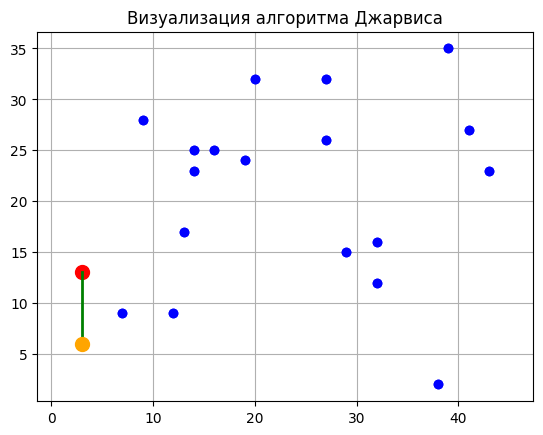

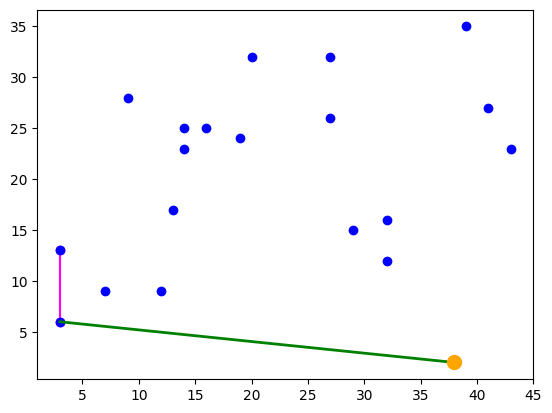

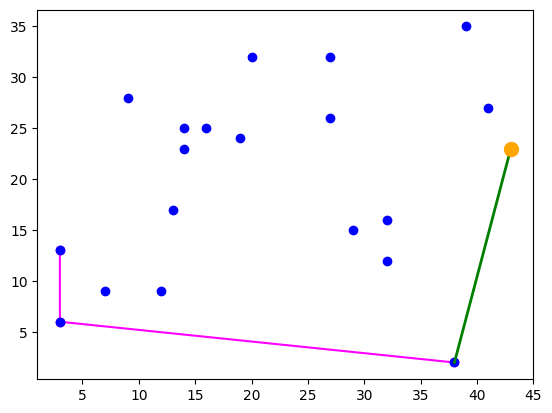

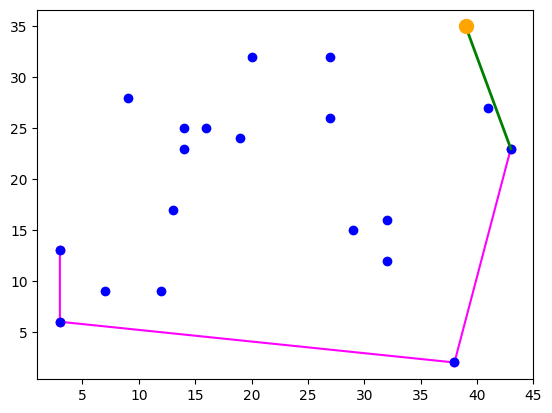

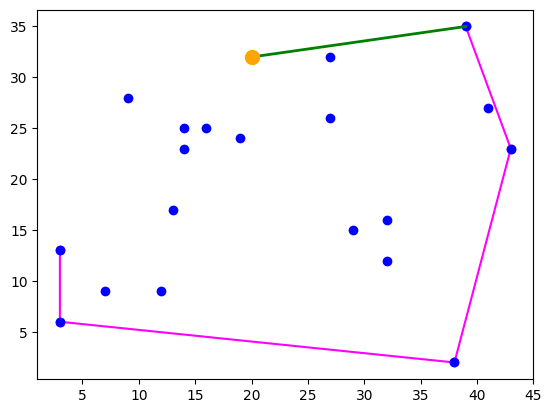

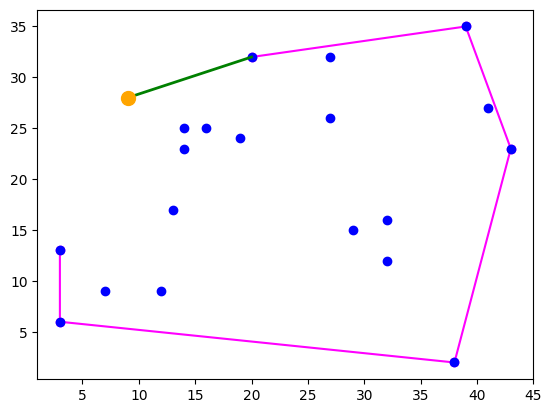

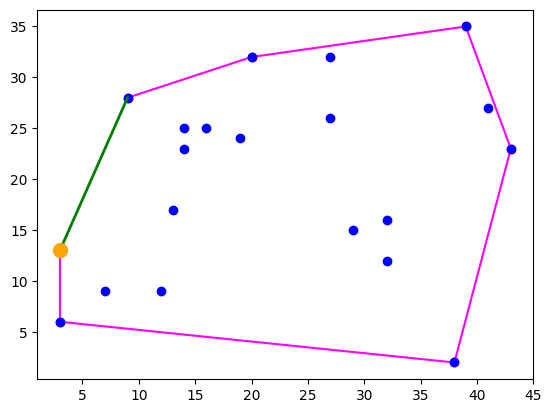

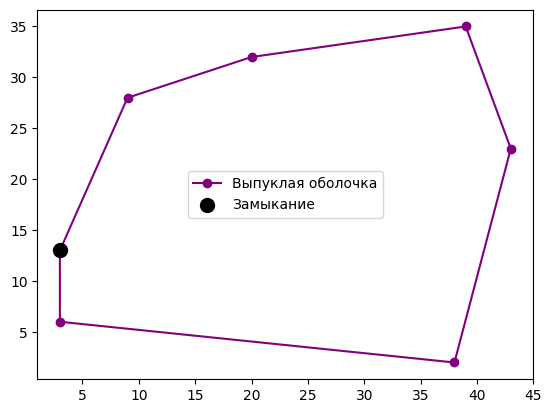

array([[ 3, 13],
       [ 3,  6],
       [38,  2],
       [43, 23],
       [39, 35],
       [20, 32],
       [ 9, 28]])

In [46]:
jarvis_animate(points)

# 3

Спроектируйте и создайте функции для построения выпуклой оболочки
заданного множества точек плоскости с использованием алгоритма
Грехема. Проведите тестирование.

In [47]:
def graham(data: np.ndarray) -> np.ndarray:

    def orientation(p, q, r):
        return (q[0] - p[0]) * (r[1] - p[1]) - (q[1] - p[1]) * (r[0] - p[0])
    
    _, indexes = np.unique(data, axis=0, return_index=True)
    points = data[np.sort(indexes)]
    
    if len(points) <= 2:
        return points

    # Находим самую нижнюю (и левую) точку
    p0 = points[np.argmin(points[:, 1])]
    points = np.delete(points, np.argmin(points[:, 1]), axis=0)  # Удаляем p0 из списка

    # Сортируем точки по углу с p0
    def polar_angle(p):
        return np.arctan2(p[1] - p0[1], p[0] - p0[0])

    points = sorted(points, key=polar_angle)

    # Добавляем p0 как первую точку в оболочку
    poly = [p0]

    for p in points:
        # Удаляем последнюю точку из оболочки, если образуется невыпуклость
        while len(poly) >= 2:
            last = poly[-1]
            second_last = poly[-2]
            # Проверка ориентации
            if orientation(second_last, last, p) <= 0:
                poly.pop()
            else:
                break

        poly.append(p)

    return np.array(poly)

In [48]:
graham(points)

array([[38,  2],
       [43, 23],
       [39, 35],
       [20, 32],
       [ 9, 28],
       [ 3, 13],
       [ 3,  6]])

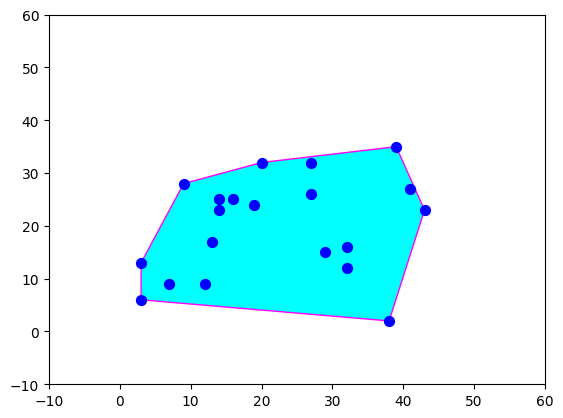

In [49]:
poly_plot = Polygon(graham(points), closed=True, edgecolor='magenta', facecolor='cyan', alpha=1)
ax = plt.subplot()
ax.add_patch(poly_plot)
ax.scatter(points[:, 0], points[:, 1], color='blue', s=50, marker='o')
ax.set_xlim(-10, 60)
ax.set_ylim(-10, 60)
plt.show()

Разница очереди на выходе в 2 алгоритмах разные, так как разные начальнве точки